In [43]:
import sympy
import numpy
from sympy import Eq, solve
from matplotlib import pyplot
from sympy.mpmath import quad
from math import log

%matplotlib notebook

def sample_function(f, start, end, step):
    xs = numpy.linspace(start=start, stop=end, num=(end-start)/step)
    ys = [f(x) for x in xs]
    return xs, ys

sympy.init_printing()

# 2. kolokvij 2011/2012, rešitve

## 1. naloga

*Poišči največjo in najmanjšo vrednost, ki jo zavzame funkcija 
$$f(x) = x^4 + 2x^3 - 2x^2 + 1.$$*

In [30]:
f = lambda x: x**4 + 2*x**3 - 2*x**2 + 1
x = sympy.Symbol('x', real=True)

Kandadati za ekstreme so stacionarne točke in krajišči našega intervala. Stacionarne točke poiščemo z rešitvijo enačbe $f'(x)=0$.


In [31]:
eq = Eq(f(x).diff(), 0)
eq

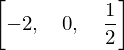

In [32]:
critical_points = sympy.solve(eq)
critical_points

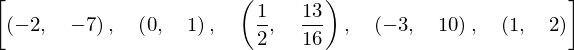

In [33]:
end_points = [-3, 1]

points = [(y, f(y)) for y in critical_points + end_points]
points

In [34]:
min(points, key=lambda point: point[1]), max(points, key=lambda point: point[1])

*Določi tudi intervale naraščanja in padanja.*

Funkcija narasca kjer je prvi odvod vecji od nic.

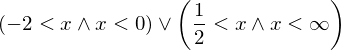

In [35]:
sympy.solvers.reduce_inequalities([f(x).diff(x) > 0])

Funkcija pada, kjer je prvi odvod manjsi od nic.

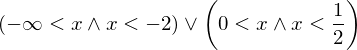

In [36]:
sympy.solvers.reduce_inequalities([f(x).diff(x) < 0])

## 2. naloga

*Odpira se kavna hisa kava. Lastniki hise zelijo mesanico kave prodajati v licnih plocevinastih skatlicah, ki imajo obliko tristrane prizme s prostornino 1. Osnovna ploskev je enakostranicni trikotnik s stranico $a$, visina prizme je $b$. Pomagaj jim poiskati optimalno velikost skatlice: koliksna naj bosta $a$ in $b$, da bodo za izdelavo porabili cim manj plocevine?*

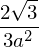

In [37]:
a = sympy.Symbol('a', real=True, positive=True)
b = sympy.Symbol('b', real=True, positive=True)
v = lambda a, b: a**2*b*sympy.sqrt(3)/2
p = lambda a, b: a**2*sympy.sqrt(3) + 3*a*b
b = solve(Eq(v(a,b), 1), b)[0]
b

Izrazavo za $b$ vstavimo v enacbo za povrsino, jo odvajamo in poiscemo resitev enacbe $p'(a) = 0.$

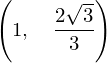

In [38]:
val_a = sympy.solve(p(a, b).diff())[0]
val_b = b.subs(a, val_a)
val_a, val_b

## 3. naloga

*Izracunaj nedolocena integrala
$$\int \frac{(1+\log(x))^2}{x}dx$$ 
in 
$$ \int (x^2 -2)e^xdx .$$*

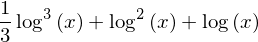

In [39]:
x = sympy.Symbol('x')
f = lambda x: (1+sympy.log(x))**2/x
g = lambda x: (x**2 - 2)*sympy.exp(x)
sympy.integrate(f(x))

In [40]:
sympy.integrate(g(x))

## 4. naloga

<IPython.core.display.Javascript object>


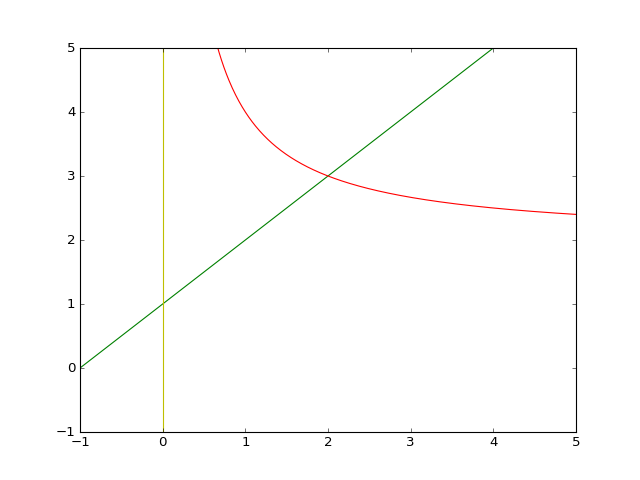

In [41]:
pyplot.ylim([-1, 5])
pyplot.xlim([-1, 5])
x = numpy.linspace(0, 2, 100)
pyplot.plot([-1, 5], [0, 6], color='g')
[xs, ys] = sample_function(lambda x: 2.0/x + 2, 0.01, 5, 0.01)
pyplot.plot(xs, ys, color='r')
pyplot.axvline(0, color='y')
pyplot.show()

Presečišča na zgornji sliki se nahajajo pri $x_1=1$ in $x_2=2$.

Ploščina lika je enaka $ \log(4) - 0.5 $. Najlažje jo izračunamo tako, da lik razdelimo na dva dela glede na $x$-koordinato: na del med $0$ in $1$ in na del med $1$ in $2$.

## 5. naloga

*Funkcija $F$ ima predpis
$$F(x) = \int_{-1}^x \frac{\log(1+t^2)}{t}dt.$$
Poisci odvod funckcije $F$.*

Njen odvod je kar enak funkciji pod integralom.

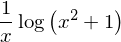

In [42]:
x = sympy.Symbol('x', real=True)
f = lambda x: sympy.log(1+x**2)/x
F = lambda x: sympy.integrate(f(t), (t, -1, x))
f(x)

*Skiciraj graf odvoda $F'$ nato pa na isto sliko se graf $F$.*

Z rdečo je narisan odvod, z zeleno pa graf funkcije $F$.

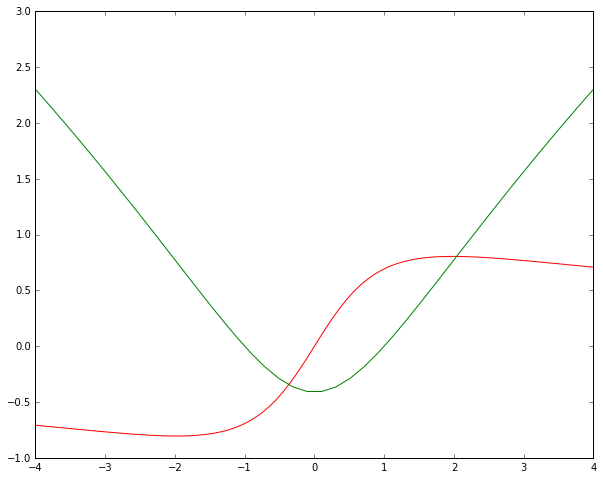

In [141]:
%matplotlib inline
from math import log

pylab.rcParams['figure.figsize'] = (10.0, 8.0)
pylab.ylim([-1, 3])
pylab.xlim([-4, 4])

[xs, ys] = sample_function(f, -5, 5, 0.1)
pyplot.plot(xs, ys, color='r')

[xs, ys] = sample_function(lambda x: F(x), -5, 5, 0.2)
pyplot.plot(xs, ys, color='g')
pyplot.show()